# PodcastFillers Dataset Overview

このノートブックでは、PodcastFillersデータセットの構造と内容を把握します。

## データセット概要
- 199エピソード（合計145時間）
- 85,803の手動アノテーション済みオーディオイベント
- フィラーワード（"uh", "um"など）約35,000個
- 非フィラーイベント（息、音楽、笑いなど）約50,000個

In [1]:
import pandas as pd
import json
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
import warnings
warnings.filterwarnings('ignore')

# 日本語フォント設定（必要に応じて）
plt.rcParams['font.sans-serif'] = ['DejaVu Sans']
plt.rcParams['axes.unicode_minus'] = False

# データパス設定
DATA_ROOT = Path('data')
METADATA_PATH = DATA_ROOT / 'metadata'
AUDIO_PATH = DATA_ROOT / 'audio'

## 1. メインアノテーションファイルの読み込み

In [2]:
# PodcastFillers.csvの読み込み
df = pd.read_csv(METADATA_PATH / 'PodcastFillers.csv')

print(f"総レコード数: {len(df):,}")
print(f"\nデータセットのカラム:")
print(df.columns.tolist())
print(f"\n最初の5行:")
df.head()

総レコード数: 85,803

データセットのカラム:
['clip_name', 'pfID', 'label_full_vocab', 'label_consolidated_vocab', 'podcast_filename', 'event_start_inepisode', 'event_end_inepisode', 'event_start_inclip', 'event_end_inclip', 'clip_start_inepisode', 'clip_end_inepisode', 'duration', 'confidence', 'n_annotators', 'episode_split_subset', 'clip_split_subset', 'pitch_cent']

最初の5行:


,clip_name,pfID,label_full_vocab,label_consolidated_vocab,podcast_filename,event_start_inepisode,event_end_inepisode,event_start_inclip,event_end_inclip,clip_start_inepisode,clip_end_inepisode,duration,confidence,n_annotators,episode_split_subset,clip_split_subset,pitch_cent
0,00000.wav,0,Agree,NaN,The Voice of 5G_Episode 12_5G & IoT,1592.770048,1593.129984,0.320032,0.679968,1592.450016,1593.450016,0.359936,1.0,2,train,extra,2335.659222
1,00001.wav,1,Music,Music,UX Podcast_#198 Connected content with Carrie ...,2231.030000,2231.420000,0.305000,0.695000,2230.725000,2231.725000,0.390000,1.0,2,train,train,1466.040477
2,00002.wav,2,Uh,Uh,Education_Ep 1 - Handmade Dev Show 2017,1271.340000,1271.790080,0.274960,0.725040,1271.065040,1272.065040,0.450080,1.0,2,validation,validation,1249.172108
3,00003.wav,3,Breath,Breath,Design Story_025 Moira Cullen Design is Soft P...,2608.590029,2608.770000,0.410014,0.589986,2608.180014,2609.180014,0.179971,1.0,2,test,test,6181.648929
4,00004.wav,4,Music,Music,The Come Up Show_Lizzo shares stories about he...,1139.150029,1139.410000,0.370014,0.629986,1138.780014,1139.780014,0.259971,1.0,3,train,train,3465.520202


In [3]:
# データセットの基本統計
print("=== データセット基本情報 ===")
print(f"\n総イベント数: {len(df):,}")
print(f"ユニークなエピソード数: {df['podcast_filename'].nunique()}")
print(f"\nデータ分割:")
print(df['clip_split_subset'].value_counts())
print(f"\nエピソード分割:")
print(df['episode_split_subset'].value_counts())

=== データセット基本情報 ===

総イベント数: 85,803
ユニークなエピソード数: 199

データ分割:
clip_split_subset
train         64835
test           9475
extra          9114
validation     2379
Name: count, dtype: int64

エピソード分割:
episode_split_subset
train         72752
test          10398
validation     2653
Name: count, dtype: int64


## 2. ラベル分布の分析

In [4]:
# フル語彙ラベルの分布
print("=== フル語彙ラベルの分布 ===")
full_vocab_counts = df['label_full_vocab'].value_counts()
print(full_vocab_counts)

# 統合語彙ラベルの分布
print("\n=== 統合語彙ラベルの分布 ===")
consolidated_counts = df['label_consolidated_vocab'].value_counts()
print(consolidated_counts)

=== フル語彙ラベルの分布 ===
label_full_vocab
Uh             17907
Um             17078
Words          12709
Repetitions     9024
Breath          8288
Laughter        6623
Music           5060
Agree           3755
Noise           2735
Overlap         1484
You know         668
Other            315
Like             157
Name: count, dtype: int64

=== 統合語彙ラベルの分布 ===
label_consolidated_vocab
Words       21733
Uh          17907
Um          17078
Breath       8288
Laughter     6623
Music        5060
Name: count, dtype: int64


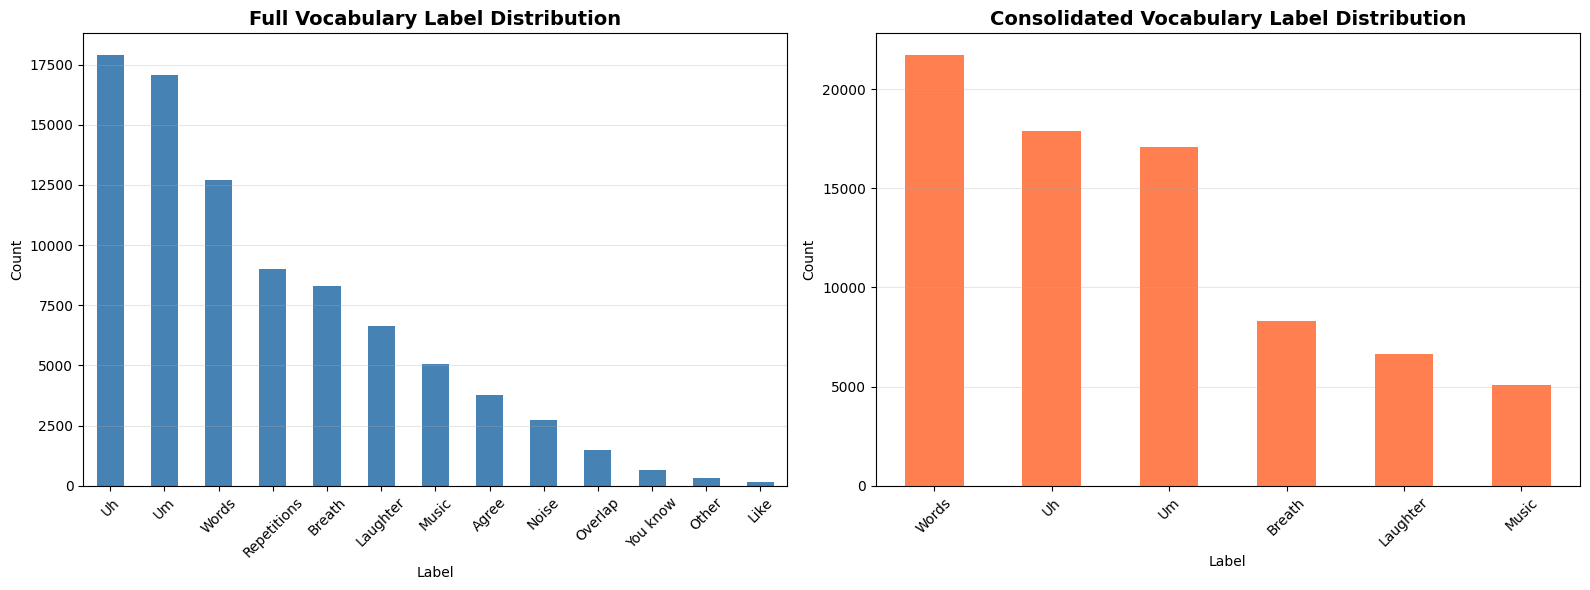


フィラーワード: 36,125 (42.1%)
非フィラーワード: 49,678 (57.9%)


In [5]:
# ラベル分布の可視化
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# フル語彙ラベル
full_vocab_counts.plot(kind='bar', ax=axes[0], color='steelblue')
axes[0].set_title('Full Vocabulary Label Distribution', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Label')
axes[0].set_ylabel('Count')
axes[0].tick_params(axis='x', rotation=45)
axes[0].grid(axis='y', alpha=0.3)

# 統合語彙ラベル
consolidated_counts.plot(kind='bar', ax=axes[1], color='coral')
axes[1].set_title('Consolidated Vocabulary Label Distribution', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Label')
axes[1].set_ylabel('Count')
axes[1].tick_params(axis='x', rotation=45)
axes[1].grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

# フィラーワード vs 非フィラーワード
filler_labels = ['Uh', 'Um', 'You know', 'Like', 'Other']
df['is_filler'] = df['label_full_vocab'].isin(filler_labels)
print(f"\nフィラーワード: {df['is_filler'].sum():,} ({df['is_filler'].sum()/len(df)*100:.1f}%)")
print(f"非フィラーワード: {(~df['is_filler']).sum():,} ({(~df['is_filler']).sum()/len(df)*100:.1f}%)")

## 3. イベント時間の分析

In [6]:
# イベント継続時間の統計
print("=== イベント継続時間の統計（秒） ===")
print(df['duration'].describe())

# ラベルごとの平均継続時間
print("\n=== ラベルごとの平均継続時間 ===")
duration_by_label = df.groupby('label_full_vocab')['duration'].agg(['mean', 'std', 'min', 'max'])
duration_by_label = duration_by_label.sort_values('mean', ascending=False)
print(duration_by_label.round(3))

=== イベント継続時間の統計（秒） ===
count    85803.000000
mean         0.338128
std          0.194980
min          0.150000
25%          0.200086
50%          0.289923
75%          0.419936
max          2.000000
Name: duration, dtype: float64

=== ラベルごとの平均継続時間 ===
                   mean    std   min   max
label_full_vocab                          
Music             0.519  0.409  0.15  2.00
Um                0.447  0.150  0.15  1.92
Overlap           0.394  0.238  0.15  1.61
Other             0.377  0.193  0.15  1.37
Uh                0.338  0.146  0.15  1.89
Laughter          0.334  0.239  0.15  1.98
Agree             0.290  0.130  0.15  1.27
You know          0.283  0.091  0.15  1.02
Noise             0.276  0.181  0.15  1.84
Repetitions       0.273  0.132  0.15  1.65
Words             0.255  0.115  0.15  1.55
Breath            0.243  0.106  0.15  1.69
Like              0.230  0.083  0.15  0.65


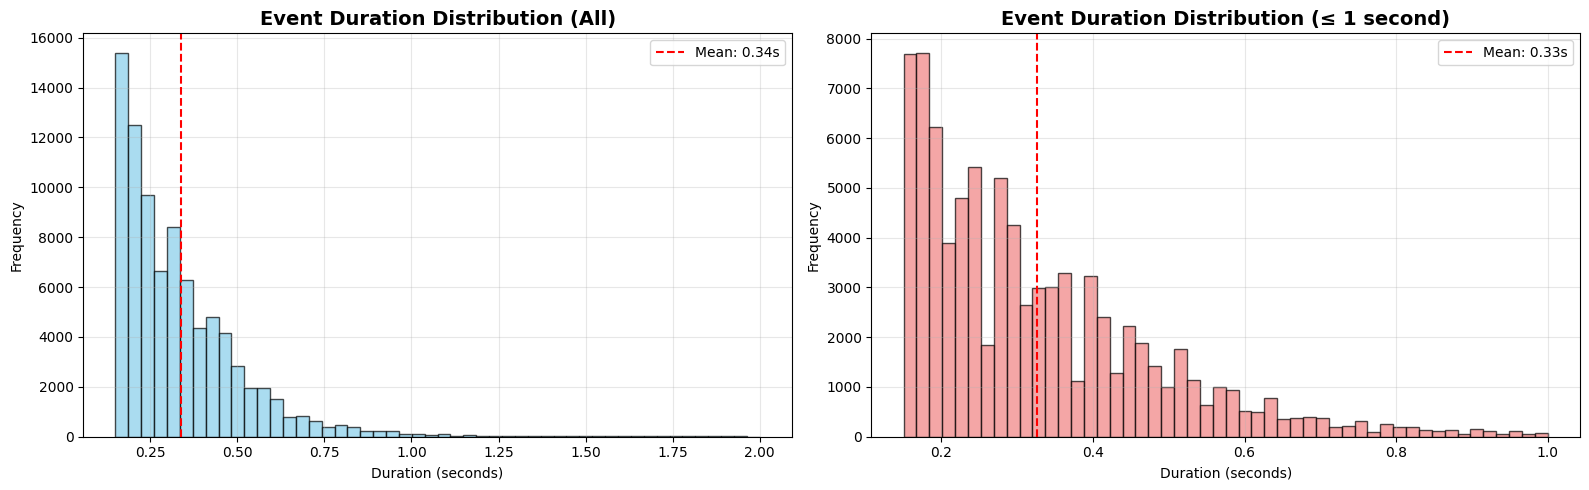


1秒を超えるイベント: 1005 (1.2%)


In [7]:
# 継続時間の分布を可視化
fig, axes = plt.subplots(1, 2, figsize=(16, 5))

# 全体の継続時間分布
axes[0].hist(df['duration'], bins=50, color='skyblue', edgecolor='black', alpha=0.7)
axes[0].set_title('Event Duration Distribution (All)', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Duration (seconds)')
axes[0].set_ylabel('Frequency')
axes[0].axvline(df['duration'].mean(), color='red', linestyle='--', label=f'Mean: {df["duration"].mean():.2f}s')
axes[0].legend()
axes[0].grid(alpha=0.3)

# 1秒以下の継続時間分布（詳細）
short_durations = df[df['duration'] <= 1.0]['duration']
axes[1].hist(short_durations, bins=50, color='lightcoral', edgecolor='black', alpha=0.7)
axes[1].set_title('Event Duration Distribution (≤ 1 second)', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Duration (seconds)')
axes[1].set_ylabel('Frequency')
axes[1].axvline(short_durations.mean(), color='red', linestyle='--', label=f'Mean: {short_durations.mean():.2f}s')
axes[1].legend()
axes[1].grid(alpha=0.3)

plt.tight_layout()
plt.show()

print(f"\n1秒を超えるイベント: {(df['duration'] > 1.0).sum()} ({(df['duration'] > 1.0).sum()/len(df)*100:.1f}%)")

## 4. アノテーション品質の分析

In [8]:
# 信頼度とアノテーター数
print("=== アノテーション品質 ===")
print(f"\n信頼度の統計:")
print(df['confidence'].describe())

print(f"\nアノテーター数の分布:")
print(df['n_annotators'].value_counts().sort_index())

print(f"\n信頼度1.0のイベント: {(df['confidence'] == 1.0).sum()} ({(df['confidence'] == 1.0).sum()/len(df)*100:.1f}%)")

=== アノテーション品質 ===

信頼度の統計:
count    85803.000000
mean         0.846923
std          0.226896
min          0.327900
25%          0.670000
50%          1.000000
75%          1.000000
max          1.000000
Name: confidence, dtype: float64

アノテーター数の分布:
n_annotators
1       22
2    55495
3    30286
Name: count, dtype: int64

信頼度1.0のイベント: 55526 (64.7%)


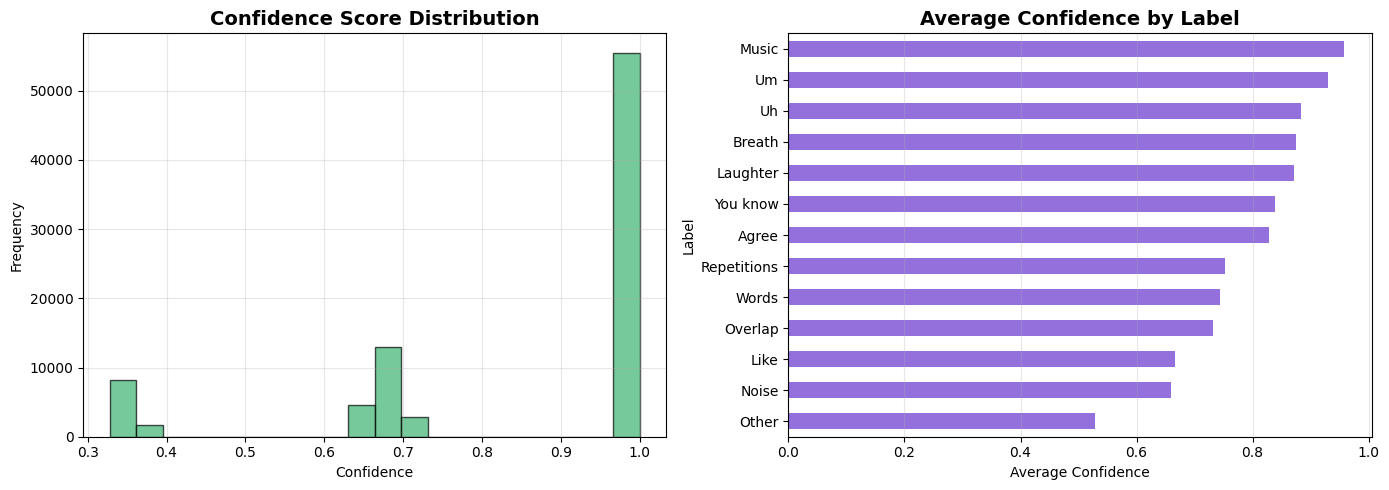

In [9]:
# 信頼度の可視化
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# 信頼度分布
axes[0].hist(df['confidence'], bins=20, color='mediumseagreen', edgecolor='black', alpha=0.7)
axes[0].set_title('Confidence Score Distribution', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Confidence')
axes[0].set_ylabel('Frequency')
axes[0].grid(alpha=0.3)

# ラベルごとの平均信頼度
conf_by_label = df.groupby('label_full_vocab')['confidence'].mean().sort_values()
conf_by_label.plot(kind='barh', ax=axes[1], color='mediumpurple')
axes[1].set_title('Average Confidence by Label', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Average Confidence')
axes[1].set_ylabel('Label')
axes[1].grid(axis='x', alpha=0.3)

plt.tight_layout()
plt.show()

## 5. サンプルデータの詳細確認

In [10]:
# trainセットから1つサンプルを抽出（pfID=1: Music）
sample_id = 1
sample = df[df['pfID'] == sample_id].iloc[0]

print("=== サンプルイベントの詳細 ===")
print(f"\nClip ID: {sample['pfID']}")
print(f"Clip Name: {sample['clip_name']}")
print(f"Label (Full): {sample['label_full_vocab']}")
print(f"Label (Consolidated): {sample['label_consolidated_vocab']}")
print(f"Episode: {sample['podcast_filename']}")
print(f"\n時間情報:")
print(f"  - Episode内の開始時刻: {sample['event_start_inepisode']:.2f}秒")
print(f"  - Episode内の終了時刻: {sample['event_end_inepisode']:.2f}秒")
print(f"  - イベント継続時間: {sample['duration']:.3f}秒")
print(f"  - Clip内の開始位置: {sample['event_start_inclip']:.3f}秒")
print(f"  - Clip内の終了位置: {sample['event_end_inclip']:.3f}秒")
print(f"\nアノテーション品質:")
print(f"  - 信頼度: {sample['confidence']}")
print(f"  - アノテーター数: {sample['n_annotators']}")
print(f"\nデータ分割:")
print(f"  - Episode split: {sample['episode_split_subset']}")
print(f"  - Clip split: {sample['clip_split_subset']}")
print(f"\n音響特徴:")
print(f"  - Pitch (cents): {sample['pitch_cent']:.2f}")

=== サンプルイベントの詳細 ===

Clip ID: 1
Clip Name: 00001.wav
Label (Full): Music
Label (Consolidated): Music
Episode: UX Podcast_#198 Connected content with Carrie Hane

時間情報:
  - Episode内の開始時刻: 2231.03秒
  - Episode内の終了時刻: 2231.42秒
  - イベント継続時間: 0.390秒
  - Clip内の開始位置: 0.305秒
  - Clip内の終了位置: 0.695秒

アノテーション品質:
  - 信頼度: 1.0
  - アノテーター数: 2

データ分割:
  - Episode split: train
  - Clip split: train

音響特徴:
  - Pitch (cents): 1466.04


## 6. エピソード単位の音声転写データの確認

In [11]:
# サンプルの転写データを読み込む
sample_episode = sample['podcast_filename']
transcript_path = METADATA_PATH / 'episode_transcripts' / sample['episode_split_subset'] / f"{sample_episode}.json"

print(f"転写ファイル: {transcript_path.name}")
print(f"パス: {transcript_path}\n")

if transcript_path.exists():
    with open(transcript_path, 'r', encoding='utf-8') as f:
        transcript_data = json.load(f)
    
    print(f"=== 音声転写データの構造 ===")
    print(f"\n総単語数: {len(transcript_data['segments'][0]['nbest'][0]['words']):,}")
    print(f"エピソード継続時間: {transcript_data['duration'] / 1e6:.2f}秒 ({transcript_data['duration'] / 1e6 / 60:.2f}分)")
    print(f"言語: {transcript_data['language']}")
    print(f"\n最初の10単語:")
    
    words = transcript_data['segments'][0]['nbest'][0]['words'][:10]
    for i, word in enumerate(words):
        print(f"{i+1:2d}. '{word['text']}' - offset: {word['offset']/1e6:.2f}s, duration: {word['duration']/1e6:.3f}s, confidence: {word['confidence']:.2f}")
    
    # 転写テキストの一部を表示
    print(f"\n転写テキストの最初の200文字:")
    full_text = ' '.join([w['text'] for w in transcript_data['segments'][0]['nbest'][0]['words'][:50]])
    print(full_text[:200] + "...")
else:
    print("転写ファイルが見つかりません")

転写ファイル: UX Podcast_#198 Connected content with Carrie Hane.json
パス: data/metadata/episode_transcripts/train/UX Podcast_#198 Connected content with Carrie Hane.json

=== 音声転写データの構造 ===

総単語数: 42
エピソード継続時間: 22820.00秒 (380.33分)
言語: en-US

最初の10単語:
 1. 'UX' - offset: 1.80s, duration: 4.700s, confidence: 0.75
 2. 'podcast' - offset: 6.60s, duration: 5.700s, confidence: 1.00
 3. 'episode' - offset: 12.30s, duration: 5.400s, confidence: 1.00
 4. '198' - offset: 17.70s, duration: 12.600s, confidence: 1.00
 5. 'You're' - offset: 213.40s, duration: 2.400s, confidence: 0.51
 6. 'listening' - offset: 215.80s, duration: 3.900s, confidence: 1.00
 7. 'to' - offset: 219.70s, duration: 2.100s, confidence: 1.00
 8. 'us' - offset: 221.80s, duration: 3.000s, confidence: 0.90
 9. 'podcast' - offset: 224.80s, duration: 6.900s, confidence: 1.00
10. 'coming' - offset: 231.70s, duration: 3.300s, confidence: 1.00

転写テキストの最初の200文字:
UX podcast episode 198 You're listening to us podcast coming to you from Stockhol

## 7. エピソード単位のアノテーションデータ

In [12]:
# サンプルエピソードのアノテーションファイル
episode_annotation_path = METADATA_PATH / 'episode_annotations' / sample['episode_split_subset'] / f"{sample_episode}.csv"

if episode_annotation_path.exists():
    episode_df = pd.read_csv(episode_annotation_path)
    print(f"=== エピソード '{sample_episode}' のアノテーション ===")
    print(f"\n総イベント数: {len(episode_df)}")
    print(f"\nラベル分布:")
    print(episode_df['label_full_vocab'].value_counts())
    
    print(f"\n最初の5イベント:")
    display(episode_df[['pfID', 'label_full_vocab', 'event_start_inepisode', 'event_end_inepisode', 'duration', 'confidence']].head())
else:
    print("エピソードアノテーションファイルが見つかりません")

=== エピソード 'UX Podcast_#198 Connected content with Carrie Hane' のアノテーション ===

総イベント数: 388

ラベル分布:
label_full_vocab
Um             92
Words          60
Music          56
Agree          49
Laughter       46
Repetitions    40
Uh             34
Noise           4
Breath          4
Overlap         3
Name: count, dtype: int64

最初の5イベント:


,pfID,label_full_vocab,event_start_inepisode,event_end_inepisode,duration,confidence
0,1,Music,2231.030000,2231.420000,0.390000,1.0
1,10,Um,1435.110000,1435.439923,0.329923,1.0
2,59,Um,1120.859955,1121.220000,0.360045,1.0
3,567,Music,2251.560000,2251.820000,0.260000,1.0
4,679,Words,900.140032,900.299981,0.159949,1.0


## 8. データセット全体のサマリー

In [13]:
print("="*60)
print("PodcastFillers Dataset Summary")
print("="*60)

print(f"\n【データセット規模】")
print(f"  - 総イベント数: {len(df):,}")
print(f"  - 総エピソード数: {df['podcast_filename'].nunique()}")
print(f"  - フィラーワード: {df['is_filler'].sum():,} ({df['is_filler'].sum()/len(df)*100:.1f}%)")
print(f"  - 非フィラーワード: {(~df['is_filler']).sum():,} ({(~df['is_filler']).sum()/len(df)*100:.1f}%)")

print(f"\n【データ分割】")
for subset in ['train', 'validation', 'test', 'extra']:
    count = (df['clip_split_subset'] == subset).sum()
    print(f"  - {subset:12s}: {count:6,} ({count/len(df)*100:5.1f}%)")

print(f"\n【ラベル統計（フル語彙）】")
print(f"  - 総ラベル数: {df['label_full_vocab'].nunique()}")
print(f"  - トップ3ラベル:")
for label, count in df['label_full_vocab'].value_counts().head(3).items():
    print(f"    * {label:15s}: {count:6,} ({count/len(df)*100:5.1f}%)")

print(f"\n【時間統計】")
print(f"  - 平均イベント継続時間: {df['duration'].mean():.3f}秒")
print(f"  - 中央値: {df['duration'].median():.3f}秒")
print(f"  - 標準偏差: {df['duration'].std():.3f}秒")
print(f"  - 最大値: {df['duration'].max():.3f}秒")

print(f"\n【アノテーション品質】")
print(f"  - 平均信頼度: {df['confidence'].mean():.3f}")
print(f"  - 信頼度1.0のイベント: {(df['confidence'] == 1.0).sum():,} ({(df['confidence'] == 1.0).sum()/len(df)*100:.1f}%)")
print(f"  - 平均アノテーター数: {df['n_annotators'].mean():.2f}")

print("\n" + "="*60)

PodcastFillers Dataset Summary

【データセット規模】
  - 総イベント数: 85,803
  - 総エピソード数: 199
  - フィラーワード: 36,125 (42.1%)
  - 非フィラーワード: 49,678 (57.9%)

【データ分割】
  - train       : 64,835 ( 75.6%)
  - validation  :  2,379 (  2.8%)
  - test        :  9,475 ( 11.0%)
  - extra       :  9,114 ( 10.6%)

【ラベル統計（フル語彙）】
  - 総ラベル数: 13
  - トップ3ラベル:
    * Uh             : 17,907 ( 20.9%)
    * Um             : 17,078 ( 19.9%)
    * Words          : 12,709 ( 14.8%)

【時間統計】
  - 平均イベント継続時間: 0.338秒
  - 中央値: 0.290秒
  - 標準偏差: 0.195秒
  - 最大値: 2.000秒

【アノテーション品質】
  - 平均信頼度: 0.847
  - 信頼度1.0のイベント: 55,526 (64.7%)
  - 平均アノテーター数: 2.35



## 9. オーディオファイルの確認（オプション）

実際のオーディオファイルを読み込んで波形を表示するには、以下のセルを実行してください。

注: `librosa`と`IPython.display`が必要です。

オーディオファイル: data/audio/clip_wav/train/00001.wav

サンプリングレート: 16000 Hz
音声長: 1.000秒
サンプル数: 16000


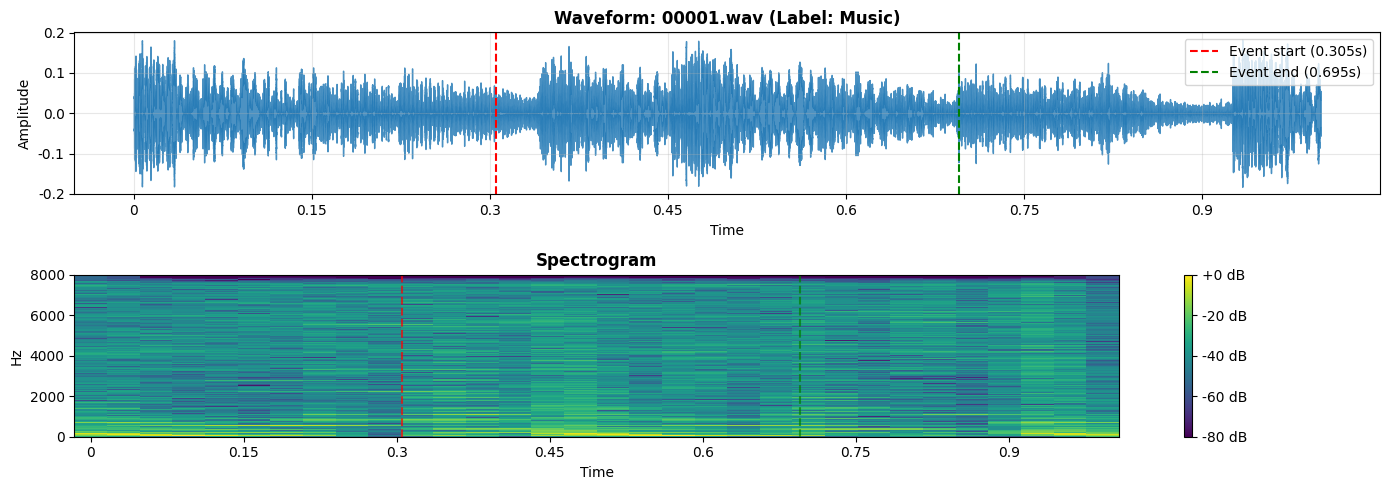


音声を再生:


In [14]:
# オーディオ処理ライブラリのインポート（オプション）
try:
    import librosa
    import librosa.display
    from IPython.display import Audio
    
    # サンプルオーディオクリップの読み込み
    audio_clip_path = AUDIO_PATH / 'clip_wav' / sample['clip_split_subset'] / sample['clip_name']
    
    if audio_clip_path.exists():
        print(f"オーディオファイル: {audio_clip_path}")
        
        # 音声読み込み
        y, sr = librosa.load(audio_clip_path, sr=16000)
        
        print(f"\nサンプリングレート: {sr} Hz")
        print(f"音声長: {len(y)/sr:.3f}秒")
        print(f"サンプル数: {len(y)}")
        
        # 波形表示
        plt.figure(figsize=(14, 5))
        
        plt.subplot(2, 1, 1)
        librosa.display.waveshow(y, sr=sr, alpha=0.8)
        plt.title(f'Waveform: {sample["clip_name"]} (Label: {sample["label_full_vocab"]})', fontweight='bold')
        plt.ylabel('Amplitude')
        
        # イベントの位置を強調表示
        event_start = sample['event_start_inclip']
        event_end = sample['event_end_inclip']
        plt.axvline(x=event_start, color='red', linestyle='--', label=f'Event start ({event_start:.3f}s)')
        plt.axvline(x=event_end, color='green', linestyle='--', label=f'Event end ({event_end:.3f}s)')
        plt.legend()
        plt.grid(alpha=0.3)
        
        # スペクトログラム
        plt.subplot(2, 1, 2)
        D = librosa.amplitude_to_db(np.abs(librosa.stft(y)), ref=np.max)
        librosa.display.specshow(D, sr=sr, x_axis='time', y_axis='hz', cmap='viridis')
        plt.colorbar(format='%+2.0f dB')
        plt.title('Spectrogram', fontweight='bold')
        plt.axvline(x=event_start, color='red', linestyle='--', alpha=0.7)
        plt.axvline(x=event_end, color='green', linestyle='--', alpha=0.7)
        
        plt.tight_layout()
        plt.show()
        
        # 音声再生
        print("\n音声を再生:")
        display(Audio(y, rate=sr))
    else:
        print(f"オーディオファイルが見つかりません: {audio_clip_path}")
        
except ImportError:
    print("librosaがインストールされていません。")
    print("音声解析を行うには以下を実行してください:")
    print("  uv add librosa ipython")

## まとめ

このノートブックでは以下を確認しました：

1. **データセット構造**: 85,803のアノテーション済みイベント、199エピソード
2. **ラベル分布**: フル語彙（13クラス）と統合語彙（6クラス）
3. **時間情報**: イベント継続時間の統計と分布
4. **アノテーション品質**: 信頼度とアノテーター数
5. **サンプルデータ**: 具体的なイベントの詳細情報
6. **音声転写**: エピソードの書き起こしデータ
7. **エピソードアノテーション**: エピソード単位のイベント情報
8. **オーディオ波形**: 実際の音声データの可視化（オプション）

### 次のステップ

- フィラーワード検出モデルの開発
- 特徴量抽出とモデルトレーニング
- FillerNetモデルの実装と評価